In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
df = pd.read_excel(r'C:\Users\Gopinath\OneDrive\Documents\healthcare-dataset-stroke-data.xlsx')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Check for missing values
print(df.isnull().sum())

# View data types
print(df.dtypes)

# Quick statistical summary
df.describe()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Step 1: Check how many 'bmi' values are missing
missing_bmi = df['bmi'].isnull().sum()
print(f"Missing BMI values before filling: {missing_bmi}")

# Step 2: Calculate the median of the 'bmi' column
# We use median because it's not affected by outliers (extremely high or low values)
median_bmi = df['bmi'].median()
print(f"Median BMI: {median_bmi}")

# Step 3: Fill all missing 'bmi' values with the median
# inplace=True means we update the original dataframe directly
df['bmi'].fillna(median_bmi, inplace=True)

# Step 4: Check again to confirm that there are no missing values left
missing_bmi_after = df['bmi'].isnull().sum()
print(f"Missing BMI values after filling: {missing_bmi_after}")


Missing BMI values before filling: 201
Median BMI: 28.1
Missing BMI values after filling: 0


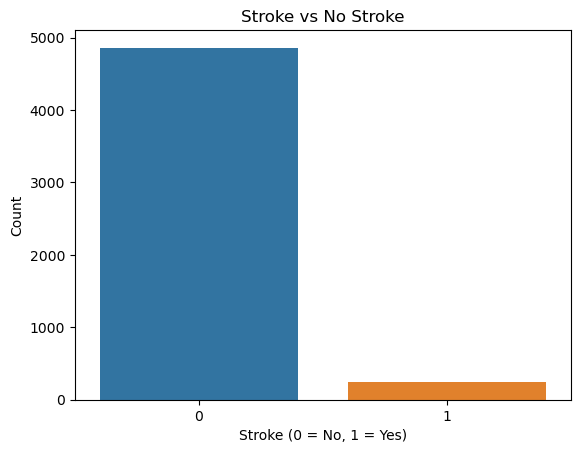

In [ ]:
# Count how many had stroke vs not
sns.countplot(x='stroke', data=df)
plt.title("Stroke vs No Stroke")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


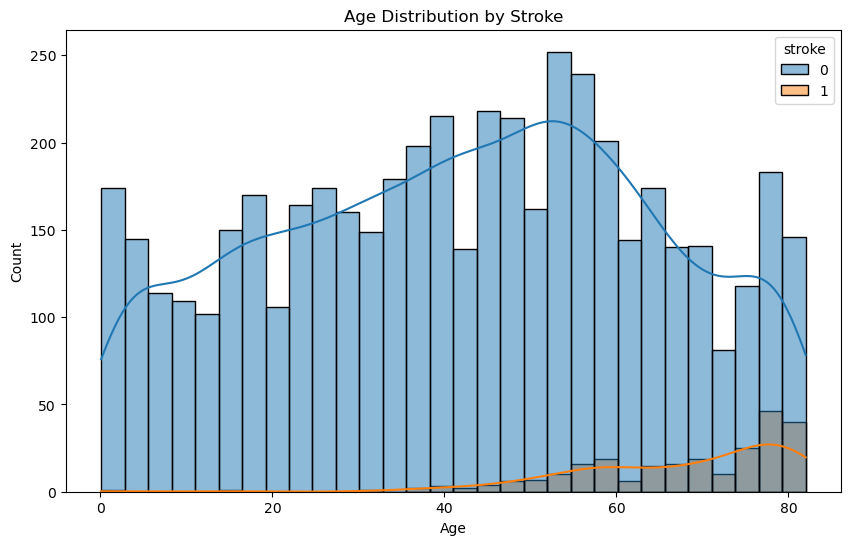

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='stroke', kde=True, bins=30)
plt.title("Age Distribution by Stroke")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [ ]:
stroke_counts = df['stroke'].value_counts()
stroke_percent = df['stroke'].value_counts(normalize=True) * 100

print("Stroke Counts:\n", stroke_counts)
print("\nStroke Percentages:\n", stroke_percent.round(2))


Stroke Counts:
 0    4861
1     249
Name: stroke, dtype: int64

Stroke Percentages:
 0    95.13
1     4.87
Name: stroke, dtype: float64


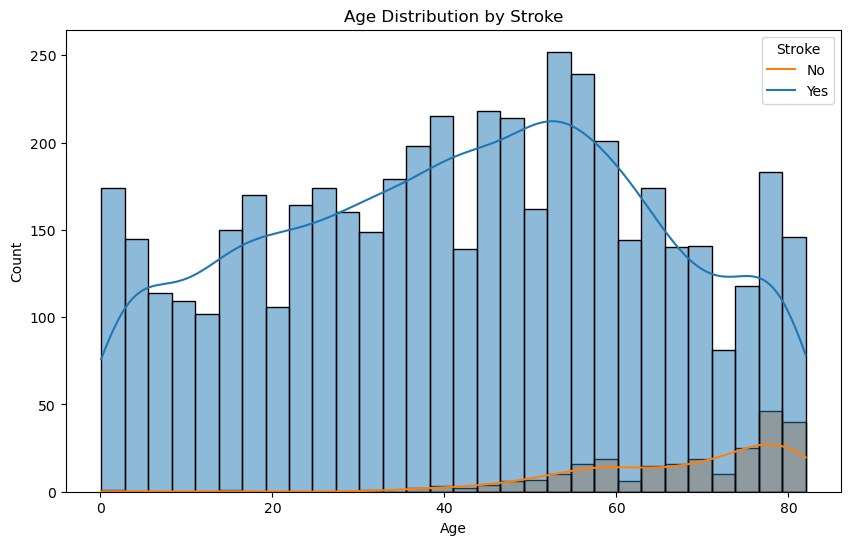

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='stroke', bins=30, kde=True)
plt.title("Age Distribution by Stroke")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()


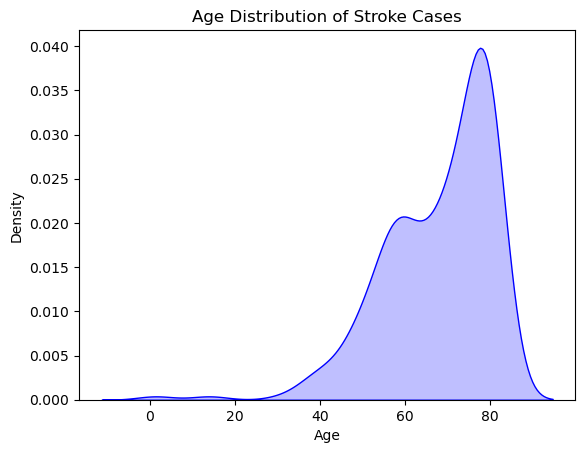

In [ ]:
sns.kdeplot(data=df[df['stroke'] == 1], x='age', shade=True, color='blue')
plt.title("Age Distribution of Stroke Cases")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


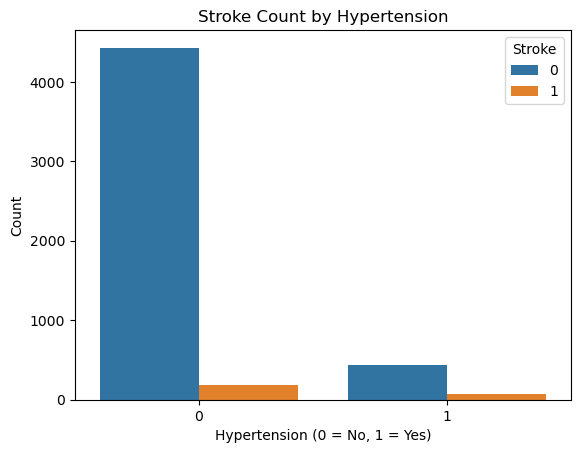

In [ ]:
sns.countplot(x='hypertension', hue='stroke', data=df)
plt.title("Stroke Count by Hypertension")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title='Stroke')
plt.show()


In [ ]:
# Grouping by hypertension and stroke to get counts
stroke_counts = df.groupby(['hypertension', 'stroke']).size().unstack()

# Fill NaN with 0 (in case there's a missing group)
stroke_counts = stroke_counts.fillna(0)

# Calculate stroke rate = stroke_yes / total * 100
stroke_counts['Stroke Rate (%)'] = (stroke_counts[1] / stroke_counts.sum(axis=1)) * 100

# Show result
stroke_counts


stroke,0,1,Stroke Rate (%)
hypertension,,,
0,4429,183,3.967910
1,432,66,13.253012


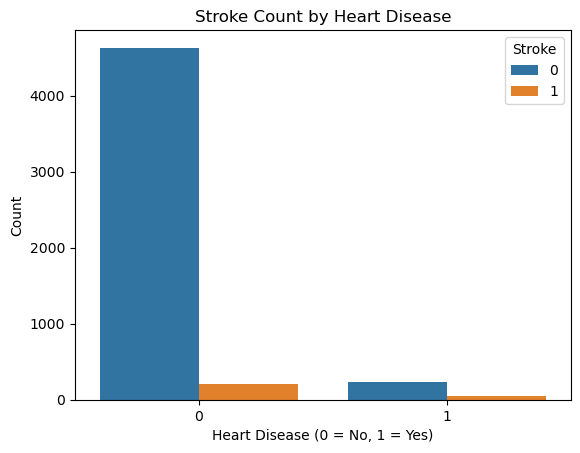

In [ ]:
sns.countplot(x='heart_disease', hue='stroke', data=df)
plt.title("Stroke Count by Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title='Stroke')
plt.show()


In [ ]:
# Grouping by heart_disease and stroke
heart_disease_counts = df.groupby(['heart_disease', 'stroke']).size().unstack()

# Fill missing values with 0
heart_disease_counts = heart_disease_counts.fillna(0)

# Stroke Rate (%) = stroke_yes / total * 100
heart_disease_counts['Stroke Rate (%)'] = (heart_disease_counts[1] / heart_disease_counts.sum(axis=1)) * 100

# Show the result
heart_disease_counts


stroke,0,1,Stroke Rate (%)
heart_disease,,,
0,4632,202,4.178734
1,229,47,17.028986


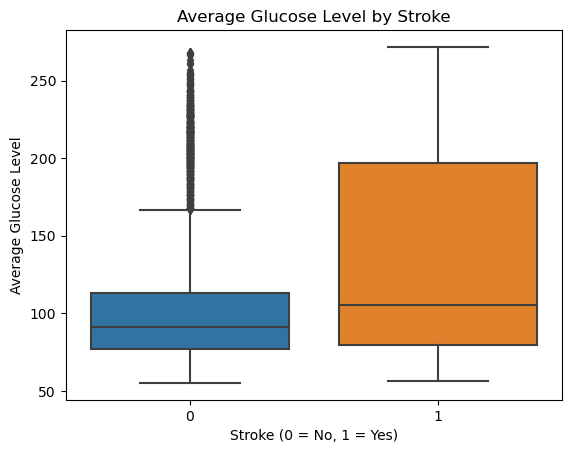

In [ ]:
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title("Average Glucose Level by Stroke")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Average Glucose Level")
plt.show()


In [ ]:
df['bmi'].isnull().sum()


0

In [ ]:
# Check for missing values
print(df.isnull().sum())

# View data types
print(df.dtypes)

# Quick statistical summary
df.describe()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


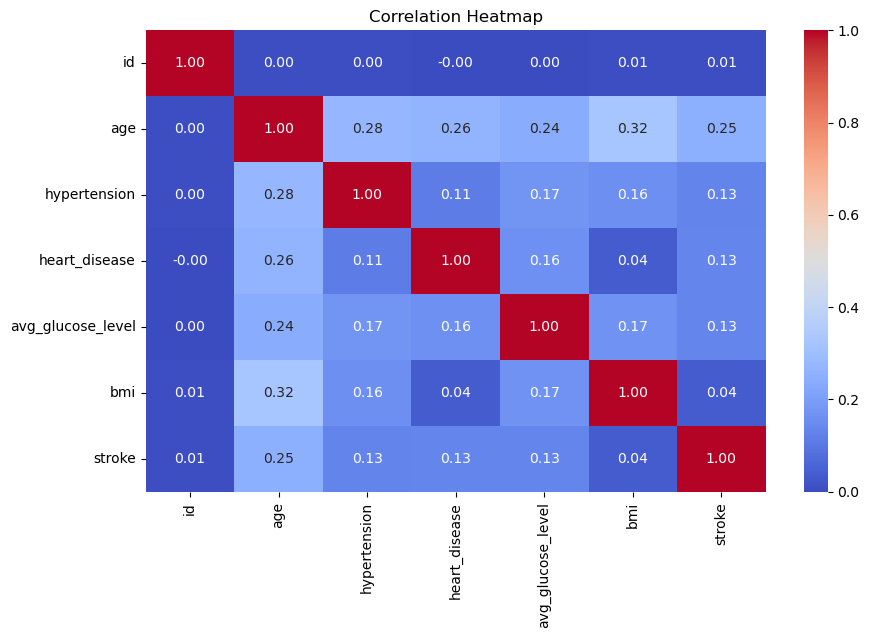

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlations
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Drop 'id' as it's not useful for prediction
df = df.drop('id', axis=1)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Show encoded dataframe shape
df_encoded.shape


(5110, 17)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Split into features and target
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)

# Show evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9393346379647749
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
 [[960   0]
 [ 62   0]]


C:\Users\Gopinath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gopinath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gopinath\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Define features (X) and target (y)
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train model with class_weight='balanced'
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7495107632093934
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.17      0.79      0.28        62

    accuracy                           0.75      1022
   macro avg       0.57      0.77      0.56      1022
weighted avg       0.93      0.75      0.81      1022

Confusion Matrix:
 [[717 243]
 [ 13  49]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the model with class_weight='balanced' to handle class imbalance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)


In [ ]:
# Accuracyprint("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))


# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
 [[960   0]
 [ 62   0]]


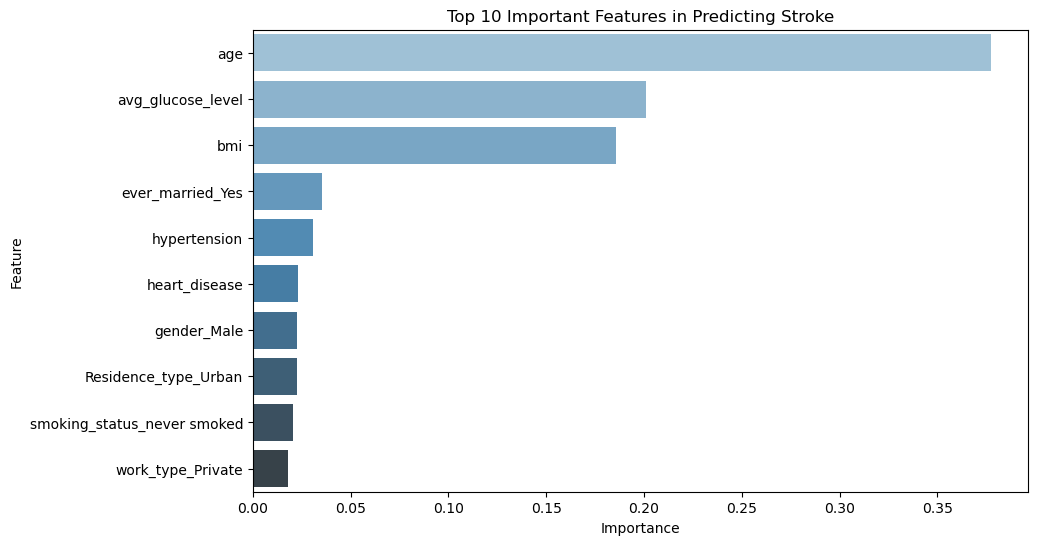

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature', palette='Blues_d')
plt.title('Top 10 Important Features in Predicting Stroke')
plt.show()


In [ ]:
!pip install imblearn


     -------------------------------------- 258.3/258.3 kB 2.7 MB/s eta 0:00:00
     -------------------------------------- 307.7/307.7 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.9393346379647749
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
 [[960   0]
 [ 62   0]]


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split data into X and y
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train Random Forest on balanced data
rf_sm = RandomForestClassifier(random_state=42)
rf_sm.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_sm = rf_sm.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_sm))
print("Classification Report:\n", classification_report(y_test, y_pred_sm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sm))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# 1. Drop ID column (not useful for prediction)
#df = df.drop('id', axis=1)

# 2. One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Split features and target
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# 6. Train Random Forest
rf_sm = RandomForestClassifier(random_state=42)
rf_sm.fit(X_train_sm, y_train_sm)

# 7. Evaluate
y_pred = rf_sm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9129158512720157
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       972
           1       0.09      0.08      0.08        50

    accuracy                           0.91      1022
   macro avg       0.52      0.52      0.52      1022
weighted avg       0.91      0.91      0.91      1022

Confusion Matrix:
 [[929  43]
 [ 46   4]]


In [ ]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:
!pip install xgboost


     -------------------------------------- 124.9/124.9 MB 2.5 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_sm, y_train_sm)



C:\Users\Gopinath\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [00:59:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Accuracy: 0.913894324853229

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       972
           1       0.13      0.14      0.14        50

    accuracy                           0.91      1022
   macro avg       0.55      0.55      0.55      1022
weighted avg       0.92      0.91      0.91      1022

Confusion Matrix:
 [[927  45]
 [ 43   7]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Get predicted probabilities
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Try a lower threshold
threshold = 0.4 # Try 0.4, 0.3, 0.2 and compare
y_pred_thresh = (y_probs > threshold).astype(int)

# Evaluate
print(f"Threshold = {threshold}")
print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))


Threshold = 0.4
Accuracy: 0.9041095890410958

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.12      0.16      0.14        50

    accuracy                           0.90      1022
   macro avg       0.54      0.55      0.54      1022
weighted avg       0.92      0.90      0.91      1022

Confusion Matrix:
 [[916  56]
 [ 42   8]]
